<a href="https://colab.research.google.com/github/Paradorn-248/MikeLab-Project/blob/main/lung_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pickle

import tensorflow as tf
from keras.preprocessing import image
from google.colab import files
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/MikelabProject/data/'

In [ ]:
f = open(data_path + 'lung_cancer.csv')
datas = pd.read_csv(f)
datas

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
# separate data by train test split
numitems = len(datas)
percenttrain = 0.80

datasTrain,datasTest = train_test_split(datas, train_size=percenttrain, random_state=0)

# print('Training set', len(datasTrain), 'items')
# print('Test set', len(datasTest), 'items')
# print(datasTrain)
# print(datasTest)

In [ ]:
features = ['AGE','SMOKING','WHEEZING','COUGHING','SHORTNESS OF BREATH','CHEST PAIN']
dt = DecisionTreeClassifier(min_samples_split=10)
dt.fit(datasTrain[features], datasTrain['LUNG_CANCER'])

predictions = dt.predict(datasTest[features])

# for i in range(len(datasTest)):
#    print('Predicted:', predictions[i], ' Actual:', datasTest['LUNG_CANCER'].iloc[i])

accuracy = accuracy_score(datasTest['LUNG_CANCER'], predictions)
print('Percent correct:', accuracy*100, '%')

Percent correct: 85.48387096774194 %


In [ ]:
# save model
# pickle.dump(dt, open('/content/drive/MyDrive/MikelabProject/data/Lung Disease Dataset/dt_model', 'wb'))

In [ ]:
load_dt_model = pickle.load(open('/content/drive/MyDrive/MikelabProject/data/Lung Disease Dataset/dt_model', 'rb'))

In [ ]:
# print(dt.predict(pd.DataFrame(np.array([[69,1,2,2,2,2]]),columns=features))[0])

In [ ]:
while(True):
  print('1=No, 2=Yes')
  age = int(input('Age:'))
  smoking = int(input('Smoking:'))
  wheezing = int(input('Wheezing:')) #หายใจมีเสียงดัง
  coughing = int(input('Coughing:'))
  breath = int(input('Shortness of breath:'))
  chest_pain = int(input('Chest pain:'))
  input_datas = pd.DataFrame(np.array([[age,smoking,wheezing,coughing,breath,chest_pain]]),columns=features)
  prediction = load_dt_model.predict(input_datas)[0]
  if(prediction == 'YES'):
    print('From your input. You risk')
  else:
    print('No risk')
  status = input('[c]ontinue or [e]xit?: ')
  if(status=='e'):
    break

In [ ]:
# #find kind of file amount
# import pathlib
# folder_list = ['Adeno','Bacterial Pneumonia','Carci','Corona Virus Disease','Normal','Squamos','Tuberculosis','Viral Pneumonia']
# summ = 0
# data_dir = pathlib.Path('/content/drive/MyDrive/MikelabProject/data/Lung Disease Dataset/train')
# # for i in folder_list:
# #   jpg = list(data_dir.glob(str(i)+'/*.jpg'))
# #   jpeg = list(data_dir.glob(str(i)+'/*.jpeg'))
# #   png = list(data_dir.glob(str(i)+'/*.png'))
# #   print(str(i)+':',len(jpg), len(jpeg), len(png))
# #------------
# for i in ['Bacterial Pneumonia']:
#   jpg = list(data_dir.glob(str(i)+'/*.jpg'))
#   jpeg = list(data_dir.glob(str(i)+'/*.jpeg'))
#   png = list(data_dir.glob(str(i)+'/*.png'))
#   print(str(i)+':',len(jpg), len(jpeg), len(png))
#   # for j in jpeg:
#   #   if(len(mpimg.imread(j).shape)>2):
#   #     print(j)
#   #     summ += 1
# #------------
# print(summ)
# # print(jpeg[1])

Bacterial Pneumonia: 0 1205 0
0


In [ ]:
# Change jpeg,jpg to png
# from PIL import Image

# im1 = Image.open(r'/content/drive/MyDrive/MikelabProject/data/Lung Disease Dataset/train/Bacterial Pneumonia/1.jpeg')
# im1.save(r'/content/drive/MyDrive/MikelabProject/data/Lung Disease Dataset/train/Bacterial Pneumonia png/015.jpg')

(173, 232, 3)


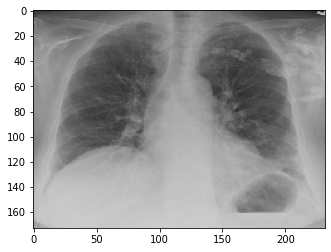

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/MikelabProject/data/Lung Disease Dataset/train/Corona Virus Disease/00030347_000.png')
print(img.shape)
plt.imshow(img)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = data_path + '/Lung Disease Dataset/train'
training_datagen = ImageDataGenerator(rescale = 1./255,data_format='channels_last')

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 200),
    class_mode = 'categorical'
)


Found 7254 images belonging to 8 classes.


In [ ]:
# print(len(list(pathlib.Path('/content/drive/MyDrive/MikelabProject/data/Lung Disease Dataset/Normal').glob('*.jpeg'))))

In [ ]:
class_list = pd.DataFrame(train_generator.class_indices,index=['class']).T
class_list

,class
Adeno,0
Bacterial Pneumonia,1
Carci,2
Corona Virus Disease,3
Normal,4
Squamos,5
Tuberculosis,6
Viral Pneumonia,7


In [ ]:
VALIDATION_DIR = data_path + '/Lung Disease Dataset/val'

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150, 200),
    class_mode = 'categorical'
)

print('Done..')

Found 2415 images belonging to 8 classes.
Done..


In [ ]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

class Mish(Activation):
    '''
    Mish Activation Function.
    .. math::
        mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + e^{x}))
    Shape:
        - Input: Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
        - Output: Same shape as the input.
    Examples:
        >>> X = Activation('Mish', name="conv1_act")(X_input)
    '''

    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'
  
def mish(inputs):
    return inputs * tf.math.tanh(tf.math.softplus(inputs))

get_custom_objects().update({'Mish': Mish(mish)})

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='Mish', input_shape=(150, 200, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.5),

  #### The second convolution layer
  tf.keras.layers.Conv2D(64, (3, 3), activation='Mish'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.5),

  #### The third convolution layer
  tf.keras.layers.Conv2D(128, (3, 3), activation='Mish'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.6),

  #### The forth convolution layer
  tf.keras.layers.Conv2D(128, (3, 3), activation='Mish'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.6),

  ##-------------------------------------------------------------------
  ## Dense layer as we have seen before
  ## Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5), #ตัวที่มาจากlayersก่อนหน้า ถ้าค่าต่ำกว่า50%จากที่ควรจะเปนจะถูกตัดทิ้ง
  ## 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='Mish'),
  tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])
print('Done..')

Done..


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 198, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 99, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 74, 99, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 97, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 36, 48, 64)       

In [ ]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=100,
                              validation_data = validation_generator, 
                              verbose = 1, validation_steps=3)
print('-------')
print('model fitting, DONE..')

Epoch 1/50
100/100 [==============================] - 840s 8s/step - loss: 1.7786 - accuracy: 0.3722 - val_loss: 1.0167 - val_accuracy: 0.5729
Epoch 2/50
100/100 [==============================] - 553s 5s/step - loss: 1.0437 - accuracy: 0.5987 - val_loss: 1.4069 - val_accuracy: 0.5104
Epoch 3/50
100/100 [==============================] - 498s 5s/step - loss: 0.9149 - accuracy: 0.6378 - val_loss: 0.9760 - val_accuracy: 0.6458
Epoch 4/50
100/100 [==============================] - 505s 5s/step - loss: 0.8482 - accuracy: 0.6581 - val_loss: 1.1874 - val_accuracy: 0.6146
Epoch 5/50
100/100 [==============================] - 496s 5s/step - loss: 0.7699 - accuracy: 0.6969 - val_loss: 0.9238 - val_accuracy: 0.6875
Epoch 6/50
100/100 [==============================] - 491s 5s/step - loss: 0.7280 - accuracy: 0.7156 - val_loss: 0.6933 - val_accuracy: 0.7500
Epoch 7/50
100/100 [==============================] - 493s 5s/step - loss: 0.6806 - accuracy: 0.7306 - val_loss: 1.0119 - val_accuracy: 0.6771

<Figure size 432x288 with 0 Axes>

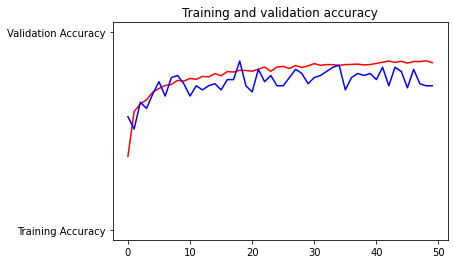

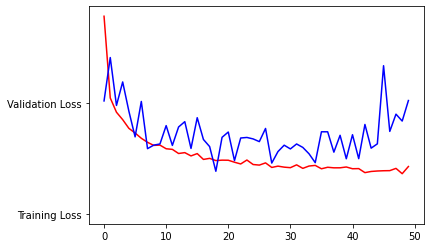

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs
 
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
 
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [ ]:
#save model
model.save('/content/drive/MyDrive/MikelabProject/data/Lung Disease Dataset/85model.h5')

In [ ]:
#load model
model2 = tf.keras.models.load_model('/content/drive/MyDrive/MikelabProject/data/Lung Disease Dataset/85model.h5',custom_objects={"mish": mish})

In [ ]:
#input image
state = ''
folder_list = ['Adeno','Bacterial Pneumonia','Carci','Corona Virus Disease','Normal','Squamos','Tuberculosis','Viral Pneumonia']
while(state!='e'):
  uploaded = files.upload()

  for fn in uploaded.keys():
  
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model2.predict(images, batch_size=10)
    print(fn)
    print(classes)
    max_ind = 0 
    maxx = 0
    for i in range(len(classes[0])):
      if(classes[0,i] > maxx):
        maxx = classes[0,i]
        max_ind = i
    print('Your disease is '+folder_list[max_ind] )
    state = input('[c]ontinue or [e]xit: ')

Saving test_0_64.jpeg to test_0_64.jpeg
test_0_64.jpeg
[[0. 0. 0. 0. 0. 0. 1. 0.]]
Your disease is Tuberculosis
[c]ontinue or [e]xit: c


Saving 31.jpeg to 31.jpeg
31.jpeg
[[0.0000000e+00 0.0000000e+00 1.5268645e-18 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00]]
Your disease is Tuberculosis
[c]ontinue or [e]xit: c


Saving 057.jpeg to 057.jpeg
057.jpeg
[[0. 0. 1. 0. 0. 0. 0. 0.]]
Your disease is Carci
[c]ontinue or [e]xit: e
